In [44]:
import matplotlib.pyplot as plt
import numpy as np
import math

EPS = 1E-9

# ==========================
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

class Circle:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius

class Line:
    def __init__(self, a, b, c):
        self.a = a
        self.b = b
        self.c = c

def plot_circle(circle):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = circle.center.x + circle.radius * np.cos(theta)
    y = circle.center.y + circle.radius * np.sin(theta)
    plt.plot(x, y, label='Circle')

def plot_tangent(line, xa, xb, ya, yb):
    if abs(line.b) > EPS:
        x = np.linspace(xa - 10, xb + 10, 100)
        y = (-line.a * x - line.c) / line.b
    else:
        x = np.full(100, -line.c / line.a)
        y = np.linspace(ya - 10, yb + 10, 100)
    plt.plot(x, y, '--', label='Tangent')

def tangents(c, r1, r2):
    ans = []
    r = r2 - r1
    z = c.x**2 + c.y**2
    d = z - r**2
    if abs(d) < EPS:
        return ans
    d = np.sqrt(np.abs(d))
    l = Line(0, 0, 0)
    l.a = (c.x * r + c.y * d) / z
    l.b = (c.y * r - c.x * d) / z
    l.c = r1
    ans.append(l)
    return ans

def find_tangents(circle_a, circle_b):
    ans = []
    for i in [-1, 1]:
        for j in [-1, 1]:
            c = Point(circle_b.center.x - circle_a.center.x, circle_b.center.y - circle_a.center.y)
            ans.extend(tangents(c, circle_a.radius * i, circle_b.radius * j))
    for line in ans:
        line.c -= line.a * circle_a.center.x + line.b * circle_a.center.y
    return ans
#=======================================================================================

def calculate_intersection(a, b, c, h, k, r, flag):

    # Рассчитываем коэффициенты для квадратного уравнения 
    A = (1 + a**2/b**2)
    B = ((-2 * h) + ((2 * a * c)/b**2) + ((2 * a * k)/b))
    C = (h**2 + (c**2/b**2) + k**2 +((2 * c * k)/b) - r**2) 
    
    # Решаем квадратное уравнение
    discriminant = B**2 - 4*A*C
    
    if discriminant == 0 or (discriminant < 0 and discriminant > -0.001) or (discriminant > 0 and discriminant < 0.001):
        # Одна точка касания
        x = (-B / (2*A))
        y = ((-c - a*x) / b)
        
        if flag == True:
            #print(x, y)
            plt.scatter(x,y)
            
        return [x, y]    
    
#=======================================================================================

def tangential_equations(circle_a, circle_b, xa, xb, ya, yb):
    
    matrix = []
    
    # Находим и рисуем касательные линии
    tangents_ab = find_tangents(circle_a, circle_b)
    for tangent in tangents_ab:
        # Выводим уравнения касательных
        matrix.append([tangent.a, tangent.b, tangent.c])
        #print(f"Уравнение линии: {tangent.a:.4f}x + {tangent.b:.4f}y + {tangent.c:.4f} = 0")
    return matrix

#=======================================================================================

def get_tangential_points(xa, ya, ra, xb, yb, rb, flag):
    
    # Создаем окружности
    circle_a = Circle(Point(xa, ya), ra)
    circle_b = Circle(Point(xb, yb), rb)

    #========================================================#
    
    point_matrix_first_round = []
    point_matrix_second_round = []
    
    matrix = tangential_equations(circle_a, circle_b, xa, xb, ya, yb)
    
    for i in range(len(matrix)):
        point_matrix_first_round.append(calculate_intersection(matrix[i][0], matrix[i][1], matrix[i][2], xa, ya, ra, flag))
        point_matrix_second_round.append(calculate_intersection(matrix[i][0], matrix[i][1], matrix[i][2], xb, yb, rb, flag))
    
    
    #1. Внешняя справа
    #2. Внешняя справа
    External_RR = [point_matrix_first_round[0], point_matrix_second_round[0]]
    
    #1. Внутренняя справа
    #2. Внутренняя слева
    Internal_RL = [point_matrix_first_round[1], point_matrix_second_round[1]]
    
    #1. Внутренняя слева
    #2. Внутренняя справа
    Internal_LR = [point_matrix_first_round[2], point_matrix_second_round[2]]
    
    #1. Внешняя слева
    #2. Внешняя слева
    External_LL = [point_matrix_first_round[3], point_matrix_second_round[3]]
    
    return [External_RR, Internal_RL, Internal_LR, External_LL]

#=======================================================================================

def graf(xa, ya, ra, xb, yb, rb):
    
    # Создаем окружности
    circle_a = Circle(Point(xa, ya), ra)
    circle_b = Circle(Point(xb, yb), rb)

    # Рисуем окружности
    plot_circle(circle_a)
    plot_circle(circle_b)

    # Находим и рисуем касательные линии
    tangents_ab = find_tangents(circle_a, circle_b)
    for line in tangents_ab:
        plot_tangent(line, xa, xb, ya, yb)
        
    # Рисуем точки касания
    get_tangential_points(xa, ya, ra, xb, yb, rb, True)
    #========================================================#
    # Настройки графика
    plt.axis('equal')
    plt.legend()
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')

    plt.xlim(xa - 10, xb + 10)
    plt.ylim(ya - 10, yb + 10)
    
    
    # Персонализированныые размеры графика
    #plt.xlim(14.5, 15)
    #plt.ylim(-0.2, 0)

    # Увеличение границ графика
    plt.tight_layout()



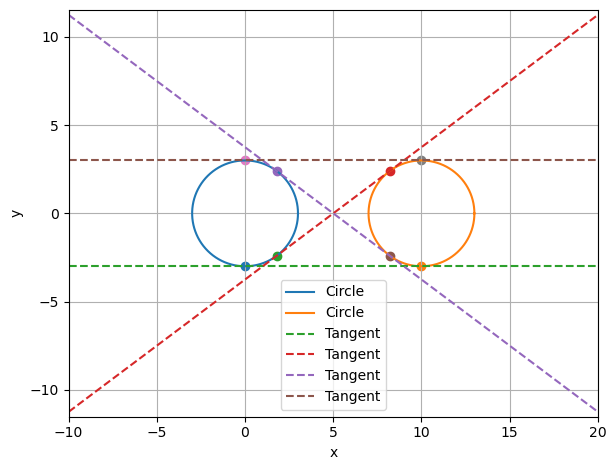

In [45]:
graf(0, 0, 3, 10, 0, 3)

### Длина дуги

In [46]:
def arc_length(angle, radius):
    return radius * math.radians(angle)


In [47]:
arc_length(60, 5)

5.235987755982988

### Рисование дуги

In [48]:
def draw_circle(R, center, start_ang, end_ang, flag1, flag2, flag3):
    
    st = 0
    en = 0

    if flag2 == 'left' and flag3 == 'L':        
        st = 90 - end_ang
        en = 90 - start_ang

        if st > en:
            en = en + 360

    elif flag2 == 'left' and flag3 == 'R':        
        st = 90 - end_ang
        en = 90 - start_ang
        
        if st > en:
            en = en + 360
    
    elif flag2 == 'right' and flag3 == 'L':     
        st = 90 - start_ang
        en = 90 - end_ang
        
        if st > en:
            en = en + 360
    
    elif flag2 == 'right' and flag3 == 'R':
        st = 90 - start_ang
        en = 90 - end_ang

        if st > en:
            en = en + 360

    else:
        print('Ошибка обозначения флага')

        
    ang = st
    end_ang = en
    coordx = []
    coordy = []
    step = 0.1
    

    while ang < end_ang:
        coordx.append(center[0] + R * math.sin(math.radians(ang)))
        coordy.append(center[1] + R * math.cos(math.radians(ang)))
        ang += step
        
    if not coordx and coordy:
        print('НЕТ ТРАЕКТОРИИ')
    
    return coordx, coordy

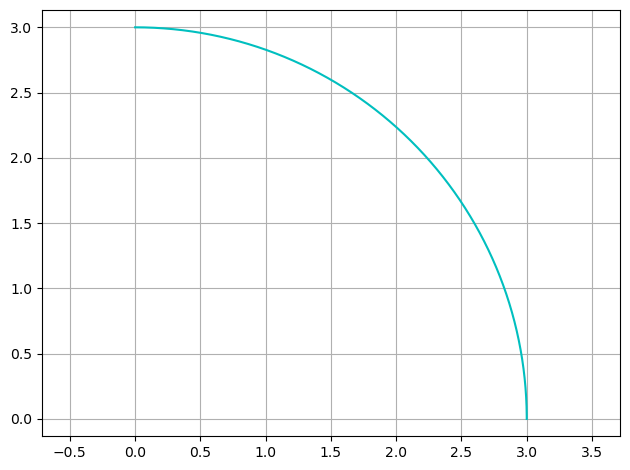

In [49]:
# Пример использования функции

X, Y = draw_circle(3, [0, 0], 0, 90, 'first', 'left', 'L')

plt.grid()
plt.axis('equal')
plt.plot(X, Y, c="c")

# Увеличение границ графика
plt.tight_layout()

### Длина линии по 2 координатам

In [50]:
def len__line(x1, y1, x2, y2):
    return math.sqrt((x1 - x2)**2 + (y1 - y2)**2)

### Рисование линии по 2 координатам

In [51]:
# Функция, рисующая линию по 2 координатам
def draw_line(x1, y1, x2, y2):
    plt.plot([x1, x2], [y1, y2], color='orange', linewidth=2)
    plt.scatter(x1, y1, c="orange")
    plt.scatter(x2, y2, c="orange")

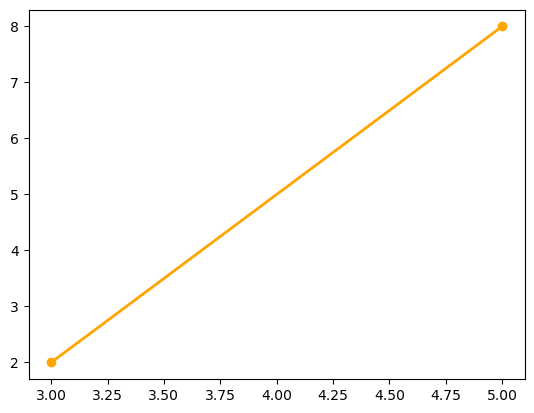

In [52]:
draw_line(3, 2, 5, 8)

### Определение угла точки по отношению к горизонтальной оси и центру окружности

In [53]:
import math

def find_angle_point(center, radius, point):
    reference_point = [center[0] + radius, center[1]]

    dx = point[0] - center[0]
    dy = point[1] - center[1]
    ref_dx = reference_point[0] - center[0]
    ref_dy = reference_point[1] - center[1]

    dot_product = dx * ref_dx + dy * ref_dy
    point_magnitude = math.sqrt(dx**2 + dy**2)
    ref_magnitude = math.sqrt(ref_dx**2 + ref_dy**2)

    angle_cos = dot_product / (point_magnitude * ref_magnitude)
    angle_rad = math.acos(angle_cos)
    angle_deg = math.degrees(angle_rad)

    if dy < 0:
        angle_deg = 360 - angle_deg

    return angle_deg


In [54]:
center = [0, 0]  # Координаты центра окружности
radius = 5  # Радиус окружности
point = [5, -5]  # Координаты точки

angle = find_angle_point(center, radius, point)
print(f"Угол: {angle} градусов")


Угол: 315.0 градусов


### Определим координаты центра окружности

In [55]:
import math

def find_circle_centers(radius, tangent_angle, tangent_point):
    # Переводим угол из градусов в радианы
    tangent_angle_rad = math.radians(tangent_angle)
    
    # Извлекаем координаты точки касания
    x, y = tangent_point
    
    # Вычисляем смещение по x и y от точки касания до центра окружности
    delta_x = radius * math.sin(tangent_angle_rad)
    delta_y = radius * math.cos(tangent_angle_rad)
    
    # Вычисляем координаты центров окружностей
    center1_x = x - delta_x
    center1_y = y + delta_y
    
    center2_x = x + delta_x
    center2_y = y - delta_y
    
    return [center1_x, center1_y], [center2_x, center2_y]


In [56]:
# Пример использования функции
radius = 3
tangent_angle = 90
tangent_point = [3, 4]

center1, center2 = find_circle_centers(radius, tangent_angle, tangent_point)
print(f"Координаты центра окружности 1: {center1}")
print(f"Координаты центра окружности 2: {center2}")


Координаты центра окружности 1: [0.0, 4.0]
Координаты центра окружности 2: [6.0, 4.0]


### Входные данные

In [57]:
start = [10, 0]
start_angle = 10
end = [-10, 15]
end_angle = 20
R = 3


### Реализация

In [58]:
# Центры окружностей
Center_L_start, Center_R_start = find_circle_centers(R, start_angle, start)
Center_L_end, Center_R_end = find_circle_centers(R, end_angle, end)

# Определяем точки касания
print("LSL")
tanget_points_LL = []
tanget_points_LL.append(get_tangential_points(Center_L_start[0], Center_L_start[1], R, Center_R_end[0], Center_R_end[1], R, False)[0])
tanget_points_LL.append(get_tangential_points(Center_L_start[0], Center_L_start[1], R, Center_L_end[0], Center_L_end[1], R, False)[0])
print(tanget_points_LL)
# Возвращаемые значения [External_RR]

print("LSR")
tanget_points_LR = []
tanget_points_LR.append(get_tangential_points(Center_L_start[0], Center_L_start[1], R, Center_R_end[0], Center_R_end[1], R, False)[1])
tanget_points_LR.append(get_tangential_points(Center_L_start[0], Center_L_start[1], R, Center_L_end[0], Center_L_end[1], R, False)[1])
print(tanget_points_LR)
# Возвращаемые значения [Internal_RL]

print("RSR")
tanget_points_RR = []
tanget_points_RR.append(get_tangential_points(Center_R_start[0], Center_R_start[1], R, Center_R_end[0], Center_R_end[1], R, False)[3])
tanget_points_RR.append(get_tangential_points(Center_R_start[0], Center_R_start[1], R, Center_L_end[0], Center_L_end[1], R, False)[3])
print(tanget_points_RR)
# Возвращаемые значения [External_LL]

print("RSL")
tanget_points_RL = []
tanget_points_RL.append(get_tangential_points(Center_R_start[0], Center_R_start[1], R, Center_R_end[0], Center_R_end[1], R, False)[2])
tanget_points_RL.append(get_tangential_points(Center_R_start[0], Center_R_start[1], R, Center_L_end[0], Center_L_end[1], R, False)[2])
print(tanget_points_RL)
# Возвращаемые значения [Internal_LR]


LSL
[[[10.820696411718018, 5.637704752926898], [-7.632298625304187, 14.864203631532552]], [[11.239837489035876, 5.383342086596012], [-9.265278407940338, 20.247996689917116]]]
LSR
[[[9.982345244331485, 5.911905194743556], [-9.47722934735527, 9.223440201935343]], [[10.614279776081025, 5.731339852683203], [-12.16128473905882, 15.04216126871115]]]
RSR
[[[8.681194216411432, -5.3240896432792155], [-10.813689886612352, 9.811255753399683]], [[8.43874392039088, -5.114154864780013], [-13.108261042586914, 15.659346256614336]]]
RSL
[[[8.160306182399413, -4.805743484624303], [-6.613301219421617, 14.032242363229955]], [[8.048056747910193, -4.6529008133038925], [-8.55317264488641, 19.517555416624997]]]


In [59]:
def greycircle():
    X, Y = draw_circle(R, Center_L_start, 0, 361, 'first', 'left', 'L')
    plt.plot(X, Y, c="lightgrey")
    X, Y = draw_circle(R, Center_R_start, 0, 361, 'first', 'left', 'R')
    plt.plot(X, Y, c="lightgrey")
    X, Y = draw_circle(R, Center_L_end, 0, 361, 'second', 'left', 'L')
    plt.plot(X, Y, c="lightgrey")
    X, Y = draw_circle(R, Center_R_end, 0, 361, 'second', 'left', 'R')
    plt.plot(X, Y, c="lightgrey")

### Траектория LSR

In [60]:
# ТАЕКТОРИЯ LSR

# Обозначение LSR_R обозначает ту траекторию, которую мы рассматриваем _ конечная окружность, с которой мы взаимодействуем
#=======================================================================#
# Стартовые углы
start_angle_LSR_R = find_angle_point(Center_L_start, R, tanget_points_LR[0][0])
start_angle_LSR_L = find_angle_point(Center_L_start, R, tanget_points_LR[1][0])

#=======================================================================#
# Длины стартовых дуг
start_arc_length_LSR_R = arc_length(start_angle_LSR_R, R)
start_arc_length_LSR_L = arc_length(start_angle_LSR_L, R)

#=======================================================================#
# Длина касательной
len__line_LSR_R = len__line(tanget_points_LR[0][0][0], tanget_points_LR[0][0][1], tanget_points_LR[0][1][0], tanget_points_LR[0][1][1])
len__line_LSR_L = len__line(tanget_points_LR[1][0][0], tanget_points_LR[1][0][1], tanget_points_LR[1][1][0], tanget_points_LR[1][1][1])

#=======================================================================#
# Конечные углы
end_angles_LSR_R = find_angle_point(Center_R_end, R, tanget_points_LR[0][1])
end_angles_LSR_L = find_angle_point(Center_L_end, R, tanget_points_LR[1][1])

#=======================================================================#
# Длины конечных дуг
end_arc_length_LSR_R = arc_length(end_angles_LSR_R, R)
end_arc_length_LSR_L = arc_length(end_angles_LSR_L, R)

#=======================================================================#
# Итоговые длины траекторий
sum_len_LSR_R = start_arc_length_LSR_R + len__line_LSR_R + end_arc_length_LSR_R
sum_len_LSR_L = start_arc_length_LSR_L + len__line_LSR_L + end_arc_length_LSR_L
print(sum_len_LSR_R)
print(sum_len_LSR_L)

#=======================================================================#


37.57752794712582
41.1263384160355


In [90]:
# LSR
def LSR1():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_L_start, find_angle_point(Center_L_start, R, start), start_angle_LSR_R, 'first', 'left', 'L')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_LR[0][0][0], tanget_points_LR[0][0][1], tanget_points_LR[0][1][0], tanget_points_LR[0][1][1])

    X1, Y1 = draw_circle(R, Center_R_end, end_angles_LSR_R, find_angle_point(Center_R_end, R, end), 'second', 'right', 'R')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

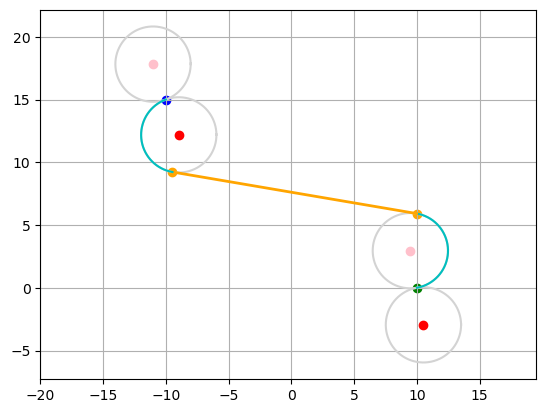

In [91]:
LSR1()

In [88]:
# LSR
def LSR2():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_L_start, find_angle_point(Center_L_start, R, start), start_angle_LSR_L, 'first', 'left', 'L')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_LR[1][0][0], tanget_points_LR[1][0][1], tanget_points_LR[1][1][0], tanget_points_LR[1][1][1])

    X1, Y1 = draw_circle(R, Center_L_end, end_angles_LSR_L, find_angle_point(Center_L_end, R, end), 'second', 'right', 'L')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

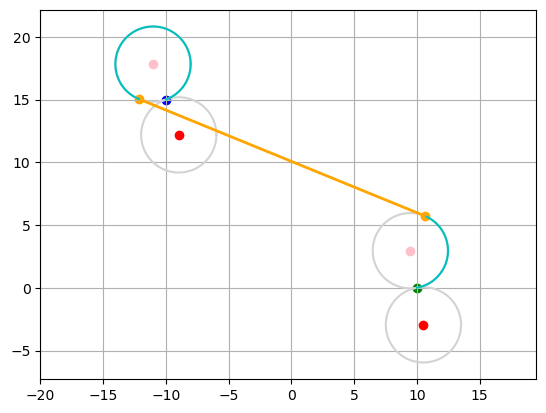

In [89]:
LSR2()

### Траектория RSL

In [63]:
# ТАЕКТОРИЯ RSL

#=======================================================================#
# Стартовые углы
start_angle_RSL_R = find_angle_point(Center_R_start, R, tanget_points_RL[0][0])
start_angle_RSL_L = find_angle_point(Center_R_start, R, tanget_points_RL[1][0])

#=======================================================================#
# Длины стартовых дуг
start_arc_length_RSL_R = arc_length(start_angle_RSL_R, R)
start_arc_length_RSL_L = arc_length(start_angle_RSL_L, R)

#=======================================================================#
# Длина касательной
len__line_RSL_R = len__line(tanget_points_RL[0][0][0], tanget_points_RL[0][0][1], tanget_points_RL[0][1][0], tanget_points_RL[0][1][1])
len__line_RSL_L = len__line(tanget_points_RL[1][0][0], tanget_points_RL[1][0][1], tanget_points_RL[1][1][0], tanget_points_RL[1][1][1])

#=======================================================================#
# Конечные углы
end_angles_RSL_R = find_angle_point(Center_R_end, R, tanget_points_RL[0][1])
end_angles_RSL_L = find_angle_point(Center_L_end, R, tanget_points_RL[1][1])

#=======================================================================#
# Длины конечных дуг
end_arc_length_RSL_R = arc_length(end_angles_RSL_R, R)
end_arc_length_RSL_L = arc_length(end_angles_RSL_L, R)

#=======================================================================#
# Итоговые длины траекторий
sum_len_RSL_R = start_arc_length_RSL_R + len__line_RSL_R + end_arc_length_RSL_R
sum_len_RSL_L = start_arc_length_RSL_L + len__line_RSL_L + end_arc_length_RSL_L

print(sum_len_RSL_R)
print(sum_len_RSL_L)
#=======================================================================#


37.35525765061944
42.358358205494646


In [86]:
# RSL
def RSL1():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_R_start, find_angle_point(Center_R_start, R, start), start_angle_RSL_R, 'first', 'right', 'R')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_RL[0][0][0], tanget_points_RL[0][0][1], tanget_points_RL[0][1][0], tanget_points_RL[0][1][1])

    X1, Y1 = draw_circle(R, Center_R_end, end_angles_RSL_R, find_angle_point(Center_R_end, R, end), 'second', 'left', 'R')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

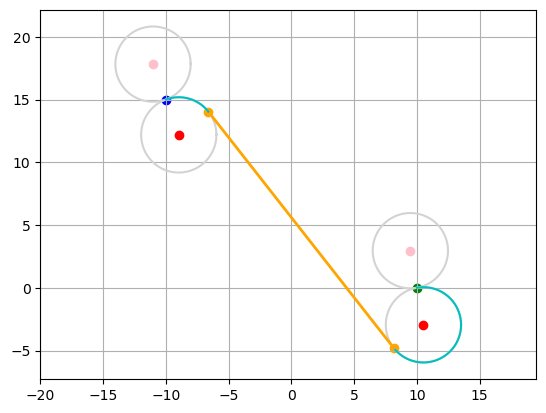

In [87]:
RSL1()

In [84]:
# RSL
def RSL2():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_R_start, find_angle_point(Center_R_start, R, start), start_angle_RSL_R, 'first', 'right', 'R')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_RL[1][0][0], tanget_points_RL[1][0][1], tanget_points_RL[1][1][0], tanget_points_RL[1][1][1])

    X1, Y1 = draw_circle(R, Center_L_end, end_angles_RSL_L, find_angle_point(Center_L_end, R, end), 'second', 'left', 'R')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

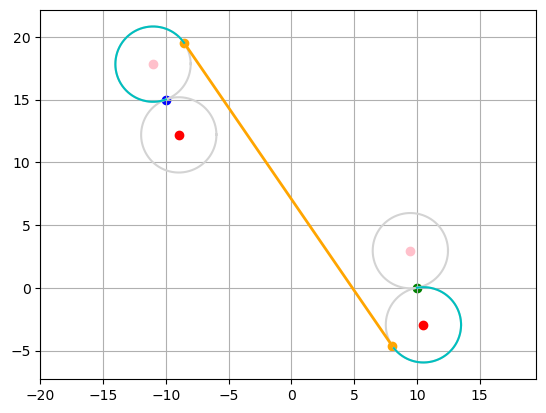

In [85]:
RSL2()

### Траектория LSL

In [66]:
# ТАЕКТОРИЯ LSL

#=======================================================================#
# Стартовые углы
start_angle_LSL_R = find_angle_point(Center_L_start, R, tanget_points_LL[0][0])
start_angle_LSL_L = find_angle_point(Center_L_start, R, tanget_points_LL[1][0])

#=======================================================================#
# Длины стартовых дуг
start_arc_length_LSL_R = arc_length(start_angle_LSL_R, R)
start_arc_length_LSL_L = arc_length(start_angle_LSL_L, R)

#=======================================================================#
# Длина касательной
len__line_LSL_R = len__line(tanget_points_LL[0][0][0], tanget_points_LL[0][0][1], tanget_points_LL[0][1][0], tanget_points_LL[0][1][1])
len__line_LSL_L = len__line(tanget_points_LL[1][0][0], tanget_points_LL[1][0][1], tanget_points_LL[1][1][0], tanget_points_LL[1][1][1])

#=======================================================================#
# Конечные углы
end_angles_LSL_R = find_angle_point(Center_R_end, R, tanget_points_LL[0][1])  
end_angles_LSL_L = find_angle_point(Center_L_end, R, tanget_points_LL[1][1])

#=======================================================================#
# Длины конечных дуг
end_arc_length_LSL_R = arc_length(end_angles_LSL_R, R)
end_arc_length_LSL_L = arc_length(end_angles_LSL_L, R)

#=======================================================================#
# Итоговые длины траекторий
sum_len_LSL_R = start_arc_length_LSL_R + len__line_LSL_R + end_arc_length_LSL_R
sum_len_LSL_L = start_arc_length_LSL_L + len__line_LSL_L + end_arc_length_LSL_L

print(sum_len_LSL_R)
print(sum_len_LSL_L)
#=======================================================================#

27.273968206853006
30.987453168515913


In [81]:
# LSL
def LSL1():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_L_start, find_angle_point(Center_L_start, R, start), start_angle_LSL_R, 'first', 'left', 'L')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_LL[0][0][0], tanget_points_LL[0][0][1], tanget_points_LL[0][1][0], tanget_points_LL[0][1][1])

    X1, Y1 = draw_circle(R, Center_R_end, end_angles_LSL_R, find_angle_point(Center_R_end, R, end), 'second', 'left', 'R')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

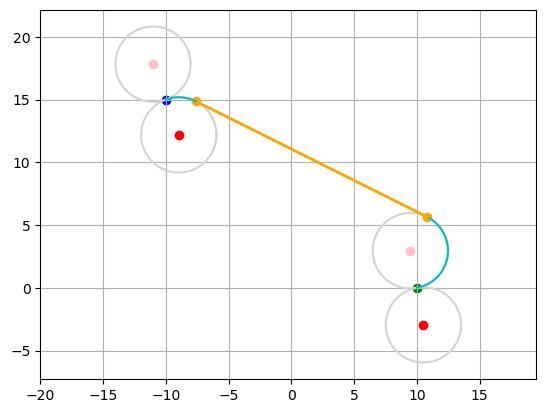

In [82]:
LSL1()

In [79]:
# LSL
def LSL2():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_L_start, find_angle_point(Center_L_start, R, start), start_angle_LSL_R, 'first', 'left', 'R')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_LL[1][0][0], tanget_points_LL[1][0][1], tanget_points_LL[1][1][0], tanget_points_LL[1][1][1])

    X1, Y1 = draw_circle(R, Center_L_end, end_angles_LSL_L, find_angle_point(Center_L_end, R, end), 'second', 'left', 'L')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

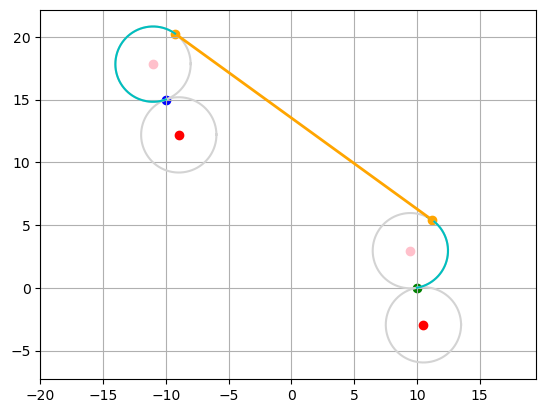

In [80]:
LSL2()

### Траектория RSR

In [69]:
# ТАЕКТОРИЯ RSR

#=======================================================================#
# Стартовые углы
start_angle_RSR_R = find_angle_point(Center_R_start, R, tanget_points_RR[0][0])
start_angle_RSR_L = find_angle_point(Center_R_start, R, tanget_points_RR[1][0])

#=======================================================================#
# Длины стартовых дуг
start_arc_length_RSR_R = arc_length(start_angle_RSR_R, R)
start_arc_length_RSR_L = arc_length(start_angle_RSR_L, R)

#=======================================================================#
# Длина касательной
len__line_RSR_R = len__line(tanget_points_RR[0][0][0], tanget_points_RR[0][0][1], tanget_points_RR[0][1][0], tanget_points_RR[0][1][1])
len__line_RSR_L = len__line(tanget_points_RR[1][0][0], tanget_points_RR[1][0][1], tanget_points_RR[1][1][0], tanget_points_RR[1][1][1])

#=======================================================================#
# Конечные углы
end_angles_RSR_R = find_angle_point(Center_R_end, R, tanget_points_RR[0][1]) 
end_angles_RSR_L = find_angle_point(Center_L_end, R, tanget_points_RR[1][1])

#=======================================================================#
# Длины конечных дуг
end_arc_length_RSR_R = arc_length(end_angles_RSR_R, R)
end_arc_length_RSR_L = arc_length(end_angles_RSR_L, R)

#=======================================================================#
# Итоговые длины траекторий
sum_len_RSR_R = start_arc_length_RSR_R + len__line_RSR_R + end_arc_length_RSR_R
sum_len_RSR_L = start_arc_length_RSR_L + len__line_RSR_L + end_arc_length_RSR_L

print(sum_len_RSR_R)
print(sum_len_RSR_L)
#=======================================================================#

48.99386442339404
53.60171118369202


In [77]:
# RSR
def RSR1():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_R_start, find_angle_point(Center_R_start, R, start), start_angle_RSR_R, 'first', 'right', 'R')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_RR[0][0][0], tanget_points_RR[0][0][1], tanget_points_RR[0][1][0], tanget_points_RR[0][1][1])

    X1, Y1 = draw_circle(R, Center_R_end, end_angles_RSR_R, find_angle_point(Center_R_end, R, end), 'second', 'right', 'R')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

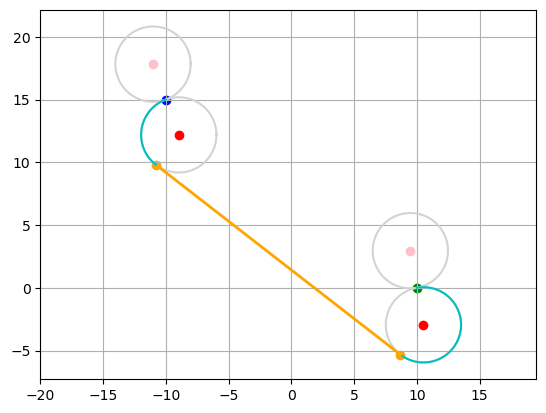

In [78]:
RSR1()

In [75]:
# RSR
def RSR2():
    plt.figure()
    plt.grid()
    plt.axis('equal')

    greycircle()

    plt.scatter(Center_L_end[0], Center_L_end[1], c="pink")
    plt.scatter(Center_R_end[0], Center_R_end[1], c="red")
    plt.scatter(Center_L_start[0], Center_L_start[1], c="pink")
    plt.scatter(Center_R_start[0], Center_R_start[1], c="red")

    X, Y = draw_circle(R, Center_R_start, find_angle_point(Center_R_start, R, start), start_angle_RSR_R, 'first', 'right', 'R')
    plt.plot(X, Y, c="c")

    draw_line(tanget_points_RR[1][0][0], tanget_points_RR[1][0][1], tanget_points_RR[1][1][0], tanget_points_RR[1][1][1])

    X1, Y1 = draw_circle(R, Center_L_end, end_angles_RSR_L, find_angle_point(Center_L_end, R, end), 'second', 'right', 'L')
    plt.plot(X1, Y1, c="c")

    plt.scatter(start[0], start[1], c="green")
    plt.scatter(end[0], end[1], c="blue")

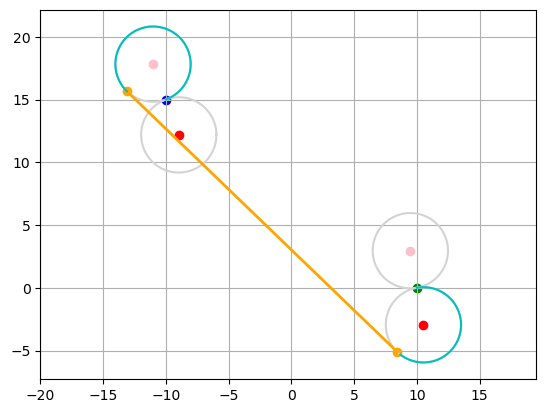

In [76]:
RSR2()

Траектория LSL


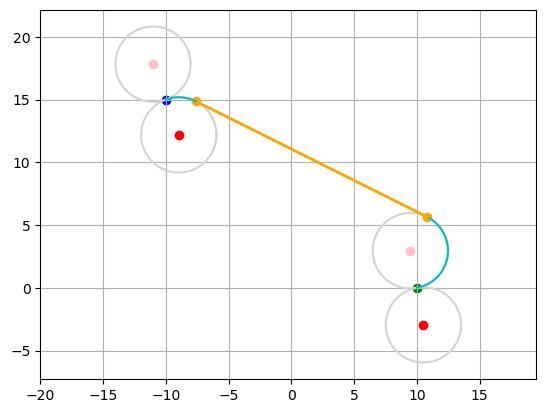

In [93]:
length = [sum_len_LSR_R, sum_len_LSR_L, sum_len_RSL_R, sum_len_RSL_L, sum_len_LSL_R, sum_len_LSL_L, sum_len_RSR_R, sum_len_RSR_L]
id_min = length.index(min(length))
if id_min == 0:
    print('Траектория LSR')
    LSR1()
elif id_min == 1:
    print('Траектория LSR')
    LSR2()
elif id_min == 2:
    print('Траектория RSL')
    RSL1()
elif id_min == 3:
    print('Траектория RSL')
    RSL2()
elif id_min == 4:
    print('Траектория LSL')
    LSL1()
elif id_min == 5:
    print('Траектория LSL')
    LSL2()
elif id_min == 6:
    print('Траектория RSR')
    RSR1()
elif id_min == 7:
    print('Траектория RSR')
    RSR2()

